

# Project: Investigate No-show appoinments Dataset
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project i will discuss and investigate No-show appoinments data in udacity dataset, and i will asking some questions and answer them to make this analysis easy amd smother for the reader, this data this dataset  is collected from 100k medical appointments in Brazil and i will focused on the question that if there is a factor of showing up or not at the appointment.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*  From this table we can conclude as we can see ther is no missing data but we have some datatype problems


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### From this table we can conclude the following:
- Maximum of Age = 115
- Mean of Age = 37
-  Hipertension = %19.7 



### Data Cleaning 

#### Drop rows with age less than 1


In [6]:
less = df[df['Age']<=0]
df.drop(less.index,inplace=True)

In [7]:
#checking if it worked
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Removing duplicates 


In [8]:
df.drop_duplicates(inplace=True)
df.shape

(106987, 14)

- There are no duplicates in this data frame

#### Fixing datatype problems

In [9]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hipertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alcoholism      106987 non-null  int64              
 11  Handcap         106987 non-null  int64              
 12  SMS_received    106987 non-null  int64              
 13  No-show       

#### Replacing zeros with nulls

In [10]:
def removeNull(nullList):
    for x in nullList:
        df[x]=df[x].replace(0,np.nan)
        

In [11]:
nullList = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap']
removeNull(nullList)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,NaN,1.0,NaN,NaN,NaN,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,NaN,NaN,NaN,NaN,NaN,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,NaN,NaN,NaN,NaN,NaN,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,NaN,NaN,NaN,NaN,NaN,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,NaN,1.0,1.0,NaN,NaN,0,No


#### Replacing 'SMS_received' with 'Yes' or 'NO'

In [12]:
df['SMS_received']= df['SMS_received'].replace(0,'No')
df['SMS_received']= df['SMS_received'].replace(1,'Yes')
df['SMS_received'].describe()

count     106987
unique         2
top           No
freq       72402
Name: SMS_received, dtype: object

#### Rename "ScheduledDay" , "AppointmentDay" & "No-show"

In [13]:
df.rename(columns={'ScheduledDay':'ScheduledDate', 'AppointmentDay':'AppointmentDate' , 'No-show':'NO_show'},inplace=True)
df.head(10)


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NO_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,NaN,1.0,NaN,NaN,NaN,No,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,NaN,NaN,NaN,NaN,NaN,No,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,NaN,NaN,NaN,NaN,NaN,No,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,NaN,NaN,NaN,NaN,NaN,No,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,NaN,1.0,1.0,NaN,NaN,No,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,NaN,1.0,NaN,NaN,NaN,No,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,NaN,NaN,NaN,NaN,NaN,No,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,NaN,NaN,NaN,NaN,NaN,No,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,NaN,NaN,NaN,NaN,NaN,No,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,NaN,NaN,NaN,NaN,NaN,No,No


#### Deleting ''AppointmentID" , "PatientId" & "Neighbourhood"

In [14]:
df.drop(['AppointmentID','PatientId','Neighbourhood'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDate,AppointmentDate,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NO_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,NaN,1.0,NaN,NaN,NaN,No,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,NaN,NaN,NaN,NaN,NaN,No,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,NaN,NaN,NaN,NaN,NaN,No,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,NaN,NaN,NaN,NaN,NaN,No,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,NaN,1.0,1.0,NaN,NaN,No,No


<a id='eda'></a>
## Exploratory Data Analysis





### assigning names to show and no show to and comparison

In [15]:
shwo = df.NO_show == 'No'
noshwo = df.NO_show == 'Yes'

In [16]:
df[shwo].count()

Gender             85307
ScheduledDate      85307
AppointmentDate    85307
Age                85307
Scholarship         8238
Hipertension       18029
Diabetes            6513
Alcoholism          2683
Handcap             1833
SMS_received       85307
NO_show            85307
dtype: int64

In [17]:
df[noshwo].count()

Gender             21680
ScheduledDate      21680
AppointmentDate    21680
Age                21680
Scholarship         2571
Hipertension        3772
Diabetes            1430
Alcoholism           677
Handcap              407
SMS_received       21680
NO_show            21680
dtype: int64

- From this methode we now know the number of pepole who show's up at the appointment is four times those didn't show up

### Can Gender affect of showing and Not showing?

Text(0, 0.5, 'Patient Number')

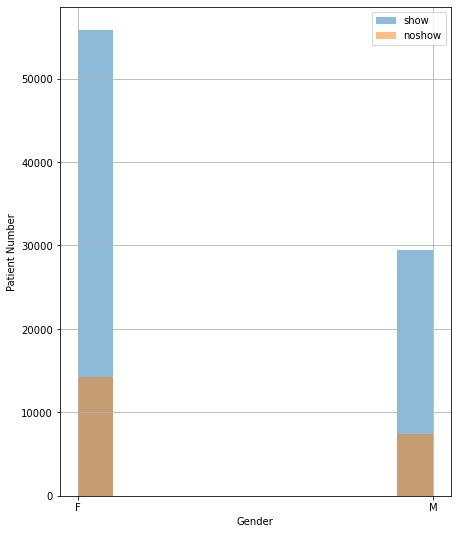

In [21]:
plt.figure(figsize=[7,9])
df.Gender[shwo].hist(alpha = 0.50, label = 'show')
df.Gender[noshwo].hist(alpha = 0.50, label = 'noshow')
plt.legend()
plt.ylabel('Patient Number')
plt.xlabel('Gender')



> Now from this histogram chart we can say there is no correlation between gender and shwoing up


### Can age affect of showing and Not showing?

Text(0.5, 0, 'Age')

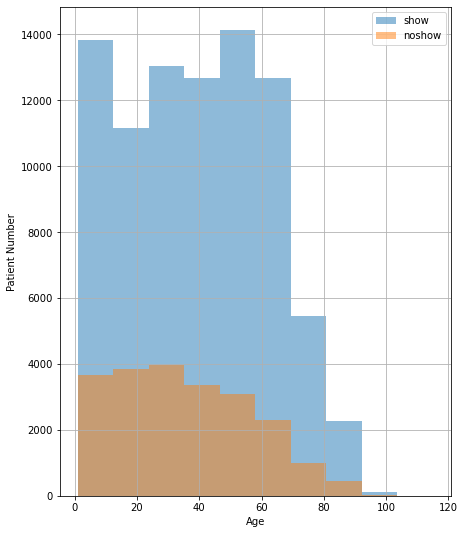

In [26]:
plt.figure(figsize=[7,9])
df.Age[shwo].hist(alpha = 0.50, label = 'show')
df.Age[noshwo].hist(alpha = 0.50, label = 'noshow')
plt.legend()
plt.ylabel('Patient Number')
plt.xlabel('Age')



### We can figure from this analysis the folloing:
- The people of age between 45-58 are most likely to shwo up 
- Older people are less likely to shwo up

### There is a relation between receiving SMS or not and shwoing up? 

Text(0.5, 0, 'Received SMS')

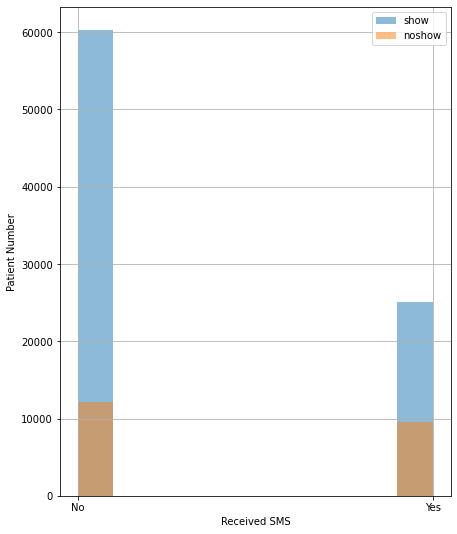

In [24]:
plt.figure(figsize=[7,9])
df.SMS_received[shwo].hist(alpha = 0.50, label = 'show')
df.SMS_received[noshwo].hist(alpha = 0.50, label = 'noshow')
plt.legend()
plt.ylabel('Patient Number')
plt.xlabel('Received SMS')


- We noticed that most patients are not receiving SMS for their appointment but still does not affect their shwoing.

<a id='conclusions'></a>
## Conclusions

After the analysis, now we can answer the folloing question which can summarize our analysis:
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>The key factor to know if the patient will show up for their appointment is the age.
Also, we noticed that neither gender nor receiving SMS will indicate whether the patient will show up or not.

### Limitations
- Receiving SMS may imporve the result if the dataframe was larger 
- If we had column that indicate the clinic we may have a better rseult
